# DeepFake Detection with MesoNet 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, LeakyReLU 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [3]:
# hight and wedith refer to the size of the image 
# channels refer to the amount of color
image_dimensions ={'height': 256, 'width':256, 'channels': 3}

In [4]:
# creat classifier class
class Classifier:
    def __init__():
        self.model = 0
        
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x,y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x,y)
    
    def load(self, path):
        self.model.load_weights(path)
        
    
    

In [6]:
# creat MesoNet class using the classifer

class Meso4(Classifier):
    def __init__(self, learning_rate= 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer, 
                           loss = 'mean_squared_error', 
                           metrics = [' accuracy'])
        
    def init_model(self):
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        x1 = Conv2D(8, (3,3), padding = 'same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size= (2, 2), padding = 'same')(x1)
        
        x2 = Conv2D(8, (5,5), padding = 'same', activation = 'relu')(x1)
        x2= BatchNormalization()(x2)
        x2= MaxPooling2D(pool_size= (2, 2), padding = 'same')(x2)
        
        
        x3= Conv2D(16, (5,5), padding = 'same', activation = 'relu')(x2)
        x3= BatchNormalization()(x3)
        x3= MaxPooling2D(pool_size= (2, 2), padding = 'same')(x3)
        
        x4= Conv2D(16 , (5,5), padding = 'same', activation = 'relu')(x3)
        x4= BatchNormalization()(x4)
        x4= MaxPooling2D(pool_size= (4, 4), padding = 'same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)
        
        
        return Model(inputs=x, outputs =y)

In [7]:
# instantiate a MesoNet with pretrained weights 

meso = Meso4()
meso.load('Meso4_DF')

In [8]:
# prepare image data

# rescaling pixel values (between 1, 255)
dataGenerator = ImageDataGenerator(rescale = 1./255)

# instantiating generator to feed imagr through the network

generator = dataGenerator.flow_from_directory('archive/data/train', target_size=(256,256), batch_size= 1, class_mode= 'binary') 


Found 11448 images belonging to 2 classes.


In [9]:
# checking class assignment 

generator.class_indices


{'fake': 0, 'real': 1}

1/1 [==============================] - 0s 28ms/step
Predicted likelihood: 0.3262
Actual label: 1
1/1 [==============================] - 0s 29ms/step

Correct predication: False


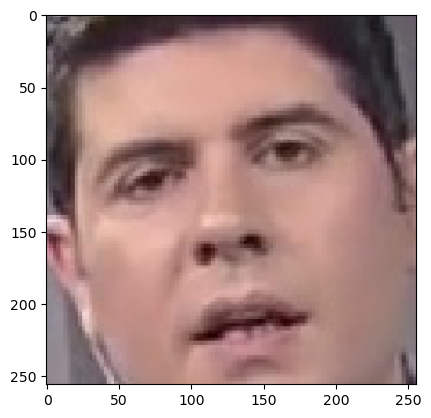

In [13]:
#Rendering image X with label y for MesoNet

X, y = generator.next()

# Evaluating predication 
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect predication: {round(meso.predict(X)[0][0])==y[0]}")
plt.imshow(np.squeeze(X));

In [ ]:
# creating separate lists for correctly classified and misclassified images
# two lists for each category one for store the image data and the second store prediction value 
correct_real = [] 
correct_real_pred = [] 

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []


### Generating predictions on validation set, starting in separate lists

for i in range(len(generator.labels)):
    #loading next pict
    X, y = generator.next()
    
    if round(meso.predict(X)[0][0])==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(meso.predict(X)[0][0])
        
    elif round (meso.predict(X)[0][0])==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(meso.predict(X)[0][0])
    
    elif round (meso.predict(X)[0][0])!=y[0] and y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(meso.predict(X)[0][0])
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(meso.predict(X)[0][0])
    
    if i % 1000 == 0:
        print(i, "predictions completed.")
    
    if i == len(generator.labels)-1:
        print("All", len(generator.labels),"predictions completed.")
                

In [22]:
def plotter(image, preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(image)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4, i+1)
        plt.imshow(np.squeeze(image[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax =plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

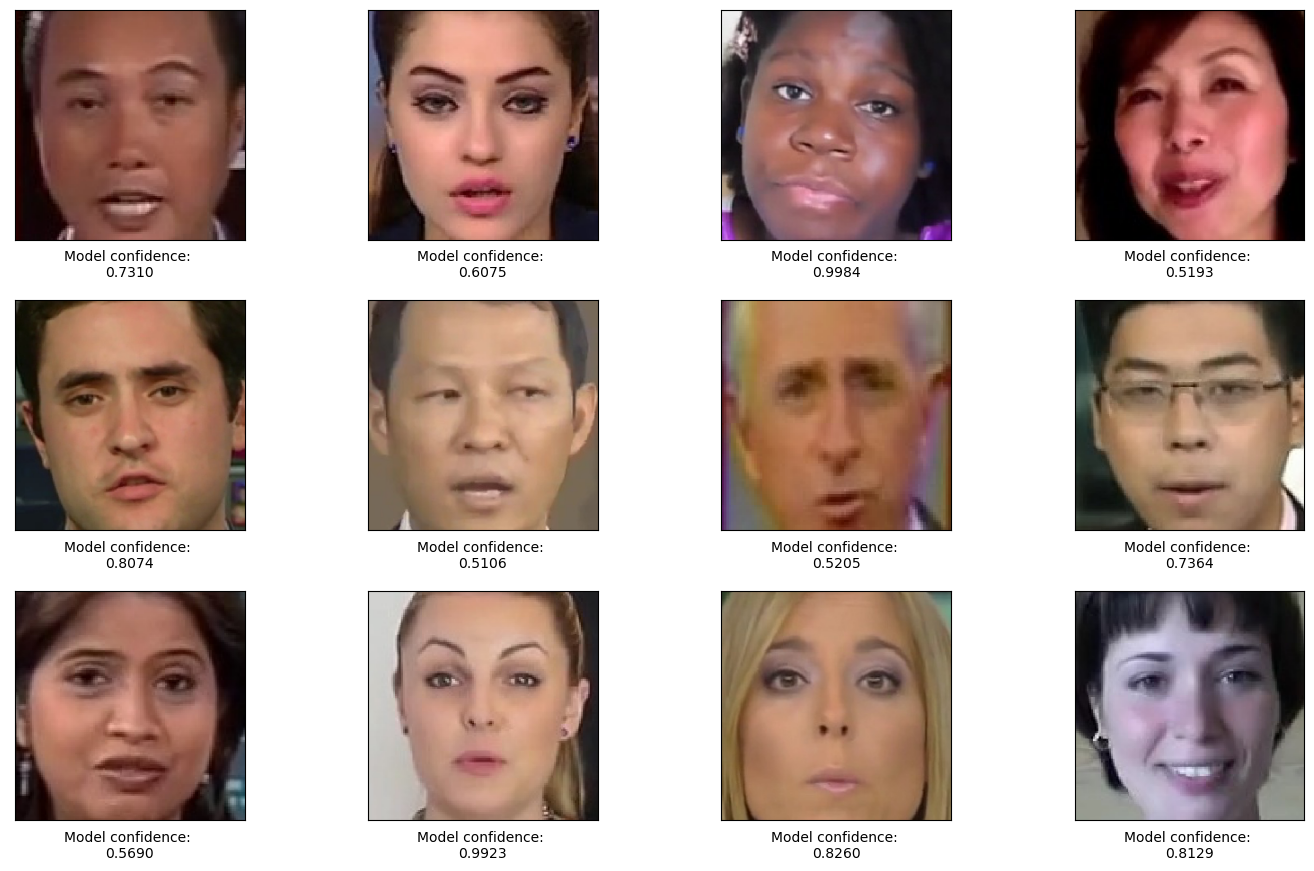

In [23]:
plotter(correct_real, correct_real_pred)

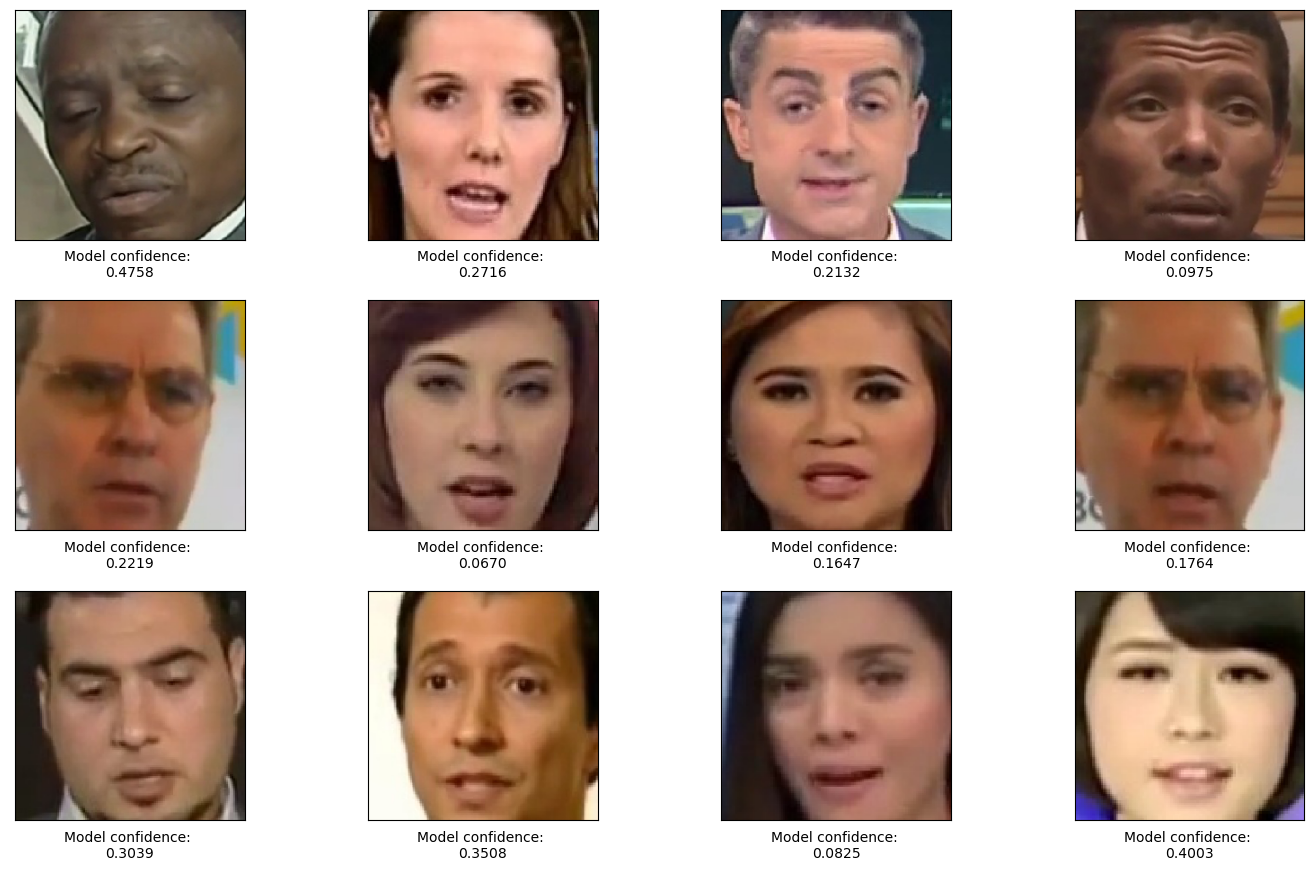

In [19]:
plotter(misclassified_real, misclassified_real_pred)

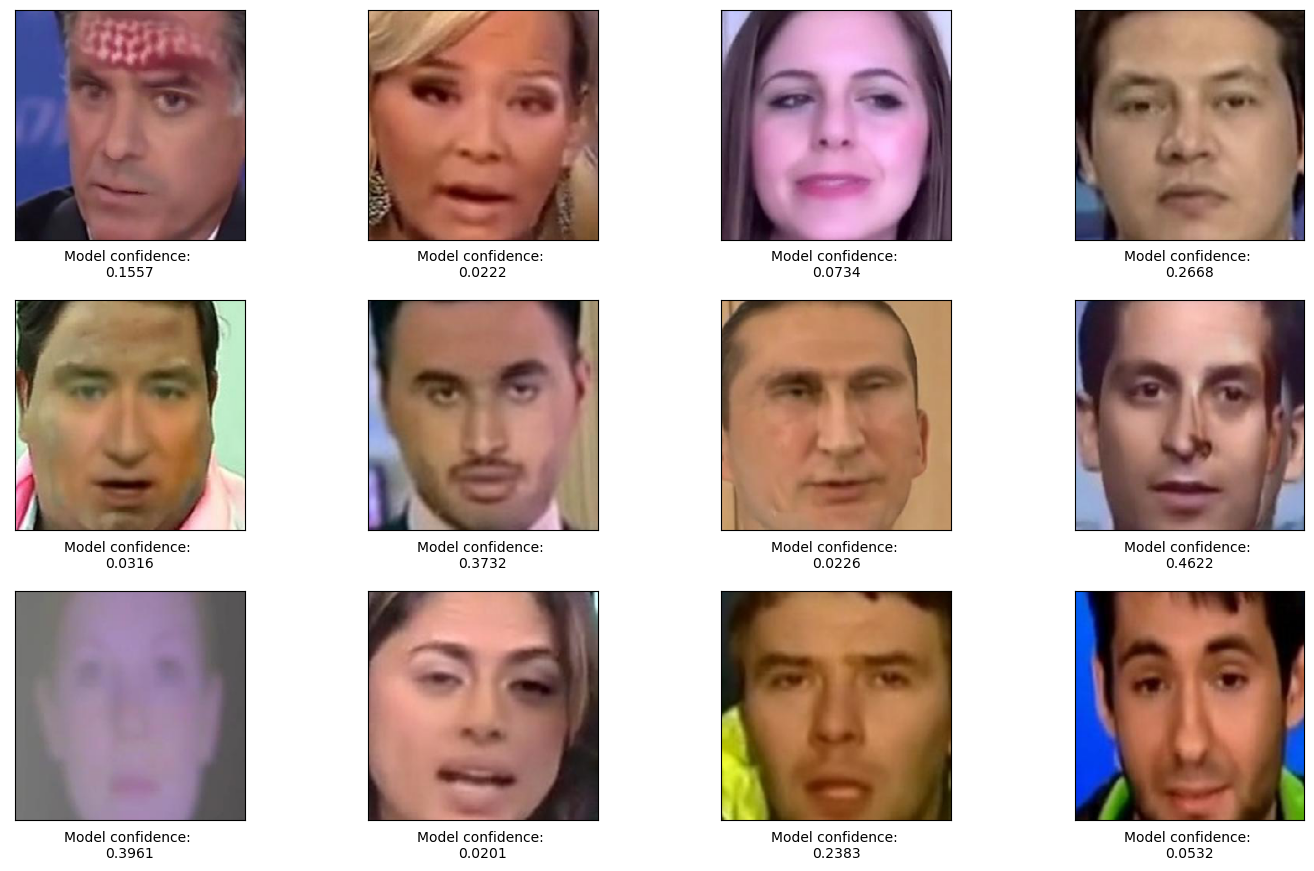

In [20]:
plotter(correct_deepfake, correct_deepfake_pred)

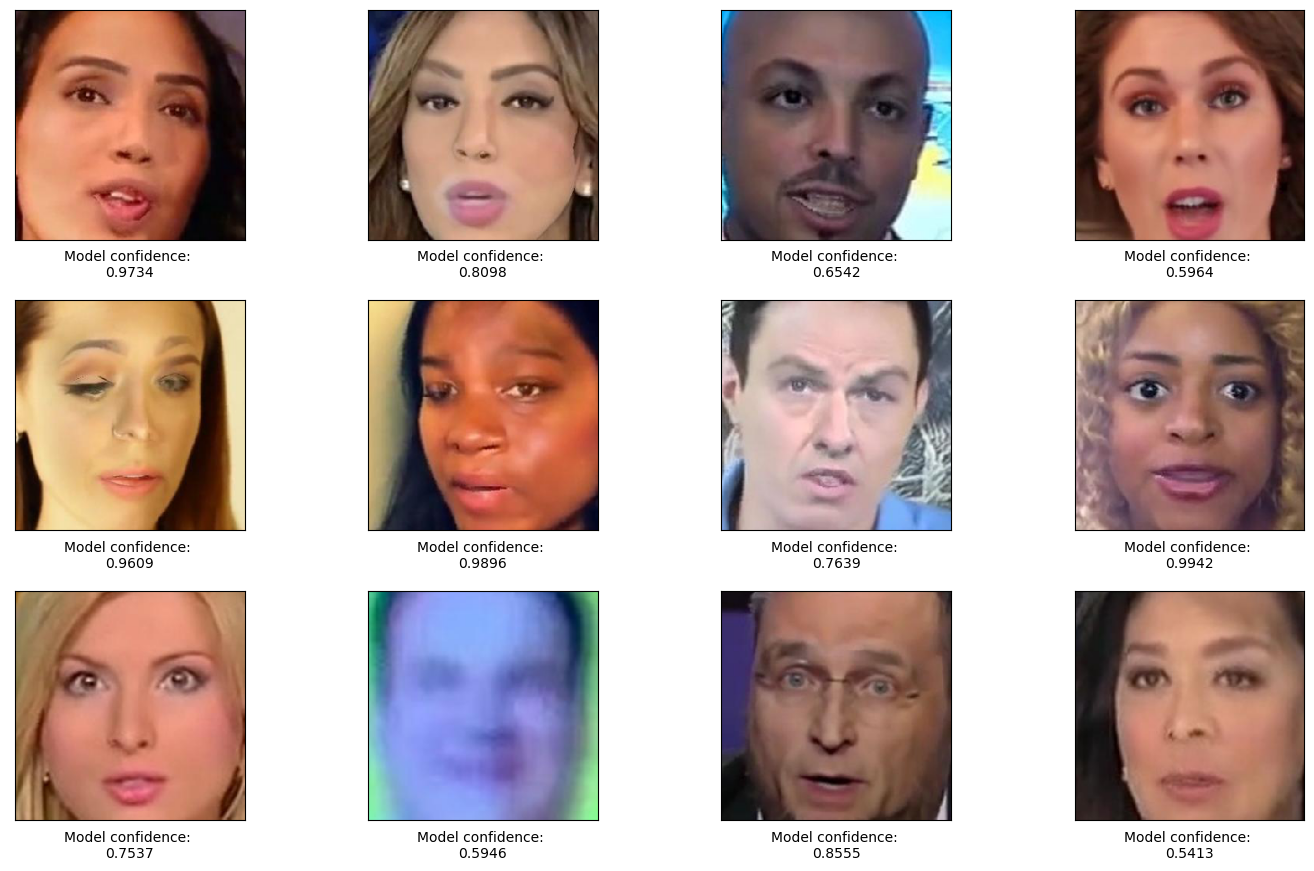

In [21]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)